<a href="https://colab.research.google.com/github/dkadiry/NBA_Player_Impact/blob/main/NBA_Player_Impact.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
#import software library 'pandas'
import numpy as np
import pandas as pd
#import numbers as nb
#import math library to perform functions
import math
#import library for ploting
import matplotlib.pyplot as plt
#to split data
from sklearn.model_selection import train_test_split

#import data
NBAdata = pd.read_csv ('/content/drive/MyDrive/ECE_9603_Project/Data/Data/nba_team_stats_00_to_21.csv')
NBA = pd.DataFrame(NBAdata)


In [3]:
NBA.head()

,teamstatspk,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,...,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,SEASON
0,0,Phoenix Suns,52,42,10,0.808,48.1,112.7,42.7,89.4,...,46.1,26.5,13.3,8.6,4.3,4.0,19.3,19.3,7.8,2020-21
1,1,Golden State Warriors,53,40,13,0.755,48.2,110.9,40.4,86.5,...,46.5,27.5,15.6,9.4,4.9,4.1,20.3,17.7,8.3,2020-21
2,2,Memphis Grizzlies,55,37,18,0.673,48.3,112.7,42.7,93.4,...,48.6,25.1,13.3,10.1,6.4,6.4,19.1,19.0,4.1,2020-21
3,3,Miami Heat,54,34,20,0.630,48.5,108.7,39.3,85.7,...,44.6,25.9,14.9,7.6,3.3,4.4,20.5,20.0,4.2,2020-21
4,4,Chicago Bulls,53,33,20,0.623,48.1,111.6,41.6,87.0,...,43.0,24.5,13.0,7.2,4.6,5.2,18.8,17.8,1.7,2020-21


In [4]:
#split data into test and training
train = NBA[NBA.SEASON!='2017-18']
test= NBA[NBA.SEASON=='2017-18']

#win percentage (output)
wins=list(NBA['WIN%'])

#direct data extraction
points=list(NBA['PTS'])
FGM=list(NBA['FGM'])
FGA=list(NBA['FGA'])
ORb=list(NBA['OREB'])
DRb=list(NBA['DREB'])
TO=list(NBA['TOV'])
FTA=list(NBA['FTA'])
FTM=list(NBA['FTM'])
plusminus=list(NBA['+/-'])
MP=list(NBA['MIN'])
P3=list(NBA['3PM'])
AST=list(NBA['AST'])
PF=list(NBA['PF'])
BLK=list(NBA['BLK'])
STL=list(NBA['STL'])

#Create Average Team
tt=len(points)
pointsA=sum(points)/tt
FGMA=sum(FGM)/tt
FGAA=sum(FGA)/tt
ORbA=sum(ORb)/tt
DRbA=sum(DRb)/tt
TOA=sum(TO)/tt
FTAA=sum(FTA)/tt
FTMA=sum(FTM)/tt
plusminusA=sum(plusminus)/tt
MPA=sum(MP)/tt
P3A=sum(P3)/tt
ASTA=sum(AST)/tt
PFA=sum(PF)/tt
BLKA=sum(BLK)/tt
STLA=sum(STL)/tt

points.append(pointsA)
FGM.append(FGMA)
FGA.append(FGAA)
ORb.append(ORbA)
DRb.append(DRbA)
TO.append(TOA)
FTA.append(FTAA)
FTM.append(FTMA)
plusminus.append(plusminusA)
MP.append(MPA)
P3.append(P3A)
AST.append(ASTA)
PF.append(PFA)
BLK.append(BLKA)
STL.append(STLA)

#offensive and defensive rating efficiency
possessions=[0]*len(points)
ORE=[0]*len(points)
pointsallowed=[0]*len(points)
DRE=[0]*len(points)
for ind,x in enumerate(points):
    possessions[ind]=0.96*(FGA[ind]-ORb[ind]+TO[ind]+0.44*FTA[ind])
    ORE[ind]=points[ind]/possessions[ind]
    pointsallowed[ind]=points[ind]+plusminus[ind]
    DRE[ind]=pointsallowed[ind]/possessions[ind]
    
#true shooting percentage
trueshooting=[0]*len(points)
for ind,x in enumerate(points):
    trueshooting[ind]=points[ind]/(2*(FGA[ind]+0.44*FTA[ind]))

#PER on team basis (lg represents league averages)
uPERteam=[0]*len(points)
paceadjustment=[0]*len(points)
aPER=[0]*len(points) #PER not scaled to make league average 15.0
lgFT=0
lgPF=0
lgFG=0
lgAST=0
lgPTS=0
lgFGA=0
lgORb=0
lgTO=0
lgFTA=0
lgDRb=0
lgTRb=0

#for league stats take all teams in training test and compute average
for x in train.teamstatspk:
    lgFT=lgFT+FTM[x]
    lgPF=lgPF+PF[x]
    lgFG=lgFG+FGM[x]
    lgAST=lgAST+AST[x]
    lgPTS=lgPTS+points[x]
    lgORb=lgORb+ORb[x]
    lgTO=lgTO+TO[x]
    lgFTA=lgFTA+FTA[x]
    lgDRb=lgDRb+DRb[x]
    lgTRb=lgTRb+DRb[x]+ORb[x]
lgFT=lgFT/len(train.teamstatspk)
lgPF=lgPF/len(train.teamstatspk)
lgFG=lgFG/len(train.teamstatspk)
lgAST=lgAST/len(train.teamstatspk)
lgPTS=lgPTS/len(train.teamstatspk)
lgORb=lgORb/len(train.teamstatspk)
lgTO=lgTO/len(train.teamstatspk)
lgFTA=lgFTA/len(train.teamstatspk)
lgDRb=lgDRb/len(train.teamstatspk)
lgTRb=lgTRb/len(train.teamstatspk)

#constants needed for PER
factor=2/3-(0.5*lgAST/lgFG)/(2*lgFG/lgFT)
VOP=lgPTS/(lgFGA-lgORb+lgTO+0.44*lgFTA)
DRBP=lgDRb/lgTRb

#calculate aPER for all teams
for ind,x in enumerate(points):
    uPERteam[ind]=(1/MP[ind])*(P3[ind] - PF[ind]*lgFT/lgPF + FTM[ind]/2*(2-AST[ind]/(3*FGM[ind])) + FGM[ind]*(2-factor*AST[ind]/FGM[ind]) + 2*AST[ind]/3 + VOP*(DRBP*(2*ORb[ind]+BLK[ind]-0.2464*(FTA[ind]-FTM[ind])-(FGA[ind]-FGM[ind])-(ORb[ind]+DRb[ind]))+0.44*lgFTA*PF[ind]/lgPF-(TO[ind]+ORb[ind])+STL[ind]+ORb[ind]+DRb[ind]-0.1936*(FTA[ind]-FTM[ind])))
    paceadjustment[ind]=2*lgPTS/(2*points[ind]-plusminus[ind])
    aPER[ind]=paceadjustment[ind]*uPERteam[ind]

#pythagorean win percentage
pwin=[0]*len(points)
const_fact=13.9
for ind,x in enumerate(points):
    pwin[ind]=(points[ind]**const_fact)/(points[ind]**const_fact+(points[ind]-plusminus[ind])**const_fact)


In [5]:
#seperate x data (ORE, DRE, points, trueshooting, aPER, pwin) into train and test
OREav=ORE.pop()
DREav=DRE.pop()
pointsav=points.pop()
trueshootingav=trueshooting.pop()
aPERav=aPER.pop()
pwinsav=pwin.pop()

OREtrain=[0]*len(train.teamstatspk)
DREtrain=[0]*len(train.teamstatspk)
pointstrain=[0]*len(train.teamstatspk)
trueshootingtrain=[0]*len(train.teamstatspk)
PERtrain=[0]*len(train.teamstatspk)
wintrain=[0]*len(train.teamstatspk)
pwintrain=[0]*len(train.teamstatspk)



In [6]:
for ind,x in enumerate(train.teamstatspk):
    OREtrain[ind]=ORE[x]
    DREtrain[ind]=DRE[x]
    pointstrain[ind]=points[x]
    trueshootingtrain[ind]=trueshooting[x]
    PERtrain[ind]=aPER[x]
    wintrain[ind]=wins[x]
    pwintrain[ind]=pwin[x]

In [7]:
OREtest=[0]*len(test.teamstatspk)
DREtest=[0]*len(test.teamstatspk)
pointstest=[0]*len(test.teamstatspk)
trueshootingtest=[0]*len(test.teamstatspk)
PERtest=[0]*len(test.teamstatspk)
wintest=[0]*len(test.teamstatspk)
pwintest=[0]*len(test.teamstatspk)
for ind,x in enumerate(test.teamstatspk):
    OREtest[ind]=ORE[x]
    DREtest[ind]=DRE[x]
    pointstest[ind]=points[x]
    trueshootingtest[ind]=trueshooting[x]
    PERtest[ind]=aPER[x]
    wintest[ind]=wins[x]
    pwintest[ind]=pwin[x]

#normalize data with respect to train data
def normalize(input1,input2):
    maxinput1=max(input2)
    mininput1=min(input2)
    output2=[0]*len(input1)
    for ind,x in enumerate(input1):
        output2[ind]=(x-mininput1)/(maxinput1-mininput1)
    return output2

OREtrainN=normalize(OREtrain,OREtrain)
DREtrainN=normalize(DREtrain,DREtrain)
pointstrainN=normalize(pointstrain,pointstrain)
trueshootingtrainN=normalize(trueshootingtrain,trueshootingtrain)
PERtrainN=normalize(PERtrain,PERtrain)
pwintrainN=normalize(pwintrain,pwintrain)
wintrainN=normalize(wintrain,wintrain)

                    
OREtestN=normalize(OREtest,OREtrain)
DREtestN=normalize(DREtest,DREtrain)
pointstestN=normalize(pointstest,pointstrain)
trueshootingtestN=normalize(trueshootingtest,trueshootingtrain)
PERtestN=normalize(PERtest,PERtrain)
pwintestN=normalize(pwintest,pwintrain)
wintestN=normalize(wintest,wintrain)

import numpy as np
X=np.column_stack((OREtrainN,DREtrainN,pointstrainN,trueshootingtrainN,PERtrainN,pwintrainN))
X2=np.column_stack((OREtestN,DREtestN,pointstestN,trueshootingtestN,PERtestN,pwintestN))

#predicted and actual wins (82 game schedule)
def unnormalize(input1,input2):
    #input1 is the function to unnormalize
    #input2 is the function used for normalization
    maxinput1=max(input2)
    mininput1=min(input2)
    output3=[0]*len(input1)
    for ind,x in enumerate(input1):
        output3[ind]=round(82*(x*(maxinput1-mininput1)+mininput1))
    return output3

#predicted and actual wins (82 game schedule)
def unnormalize2(input1,input2):
    #input1 is the function to unnormalize
    #input2 is the function used for normalization
    maxinput1=max(input2)
    mininput1=min(input2)
    output3=[0]*len(input1)
    for ind,x in enumerate(input1):
        output3[ind]=(82*(x*(maxinput1-mininput1)+mininput1))
    return output3


In [8]:
#MLP Neural Network to predict team wins
import numpy
from sklearn.neural_network import MLPRegressor
import warnings; warnings.simplefilter('ignore')
wintrainNn=[0]*len(wintrainN)
for ind,x in enumerate(wintrainN):
    wintrainNn[ind]=[x]
wintrainNnn=numpy.array(wintrainNn)

In [9]:
mlp_rg = MLPRegressor(max_iter= 100)

In [10]:
#make a dictionary of hyperparameter values to search 
search_space = {
    "hidden_layer_sizes" : [(100, 75, 50, 25, 13, 5,), (50, 40, 30, 20, 10, 5,), (100, 50, 25,), (30, 20, 10,), (100,), (50,)],
    "learning_rate_init" : [0.001, 0.01, 0.1, 1],
    "activation" : ['logistic', 'tanh', 'relu']
}

In [11]:
from sklearn.model_selection import GridSearchCV
# make a GridSearchCV object
GS = GridSearchCV(estimator = mlp_rg,
                  param_grid = search_space,
                  scoring = ["r2", "neg_root_mean_squared_error"], #to print all the sklearn scoring metrics use sklearn.metrics.SCORES.keys()
                  refit = "r2",
                  return_train_score=True,
                  cv = 5,
                  verbose = 4)

In [12]:
clf = GS.fit(X, np.ravel(wintrainNnn))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END activation=logistic, hidden_layer_sizes=(100, 75, 50, 25, 13, 5), learning_rate_init=0.001; neg_root_mean_squared_error: (train=-0.249, test=-0.239) r2: (train=-0.645, test=-0.714) total time=   1.1s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(100, 75, 50, 25, 13, 5), learning_rate_init=0.001; neg_root_mean_squared_error: (train=-0.190, test=-0.202) r2: (train=-0.004, test=-0.006) total time=   0.7s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(100, 75, 50, 25, 13, 5), learning_rate_init=0.001; neg_root_mean_squared_error: (train=-0.189, test=-0.203) r2: (train=-0.002, test=-0.004) total time=   0.7s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(100, 75, 50, 25, 13, 5), learning_rate_init=0.001; neg_root_mean_squared_error: (train=-0.194, test=-0.184) r2: (train=-0.005, test=-0.010) total time=   1.8s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(100, 75, 50, 25, 13, 5), learnin

In [13]:
print(clf.best_estimator_)

MLPRegressor(activation='tanh', learning_rate_init=0.01, max_iter=100)


In [14]:
print(clf.best_params_)

{'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.01}


In [15]:
print("Training data R2 value : ",clf.best_score_)

Training data R2 value :  0.9379384846508664


In [16]:
#Export tuning results to csv file
df = pd.DataFrame(clf.cv_results_)
sorted_df = df.sort_values('rank_test_r2')
df.to_csv("tuning_results.csv")
sorted_df.to_csv("sorted_tuning_results.csv")

In [17]:
train_curve=[0]*len(X)
test_curve=[0]*len(X2)
from sklearn.metrics import mean_absolute_error as mae
train_mae=[0]*32
test_mae=[0]*32
iteration_index2=[0]*32
for ind,vo in enumerate([0]*32):
    iteration_index=ind+1
    iteration_index2[ind]=iteration_index
    clf2 = MLPRegressor(hidden_layer_sizes=clf.best_estimator_.hidden_layer_sizes,learning_rate_init=clf.best_estimator_.learning_rate_init,activation=clf.best_estimator_.activation,max_iter=iteration_index).fit(X, np.ravel(wintrainNnn))
    for ind2,vo2 in enumerate(train_curve):
        train_curve[ind2]=float(clf2.predict(X[ind2].reshape(1,-1)))
    for ind3,vo3 in enumerate(test_curve):
        test_curve[ind3]=float(clf2.predict(X2[ind3].reshape(1,-1)))
    train_mae[ind] = mae(wintrainNnn, train_curve)
    test_mae[ind] = mae(wintestN, test_curve)

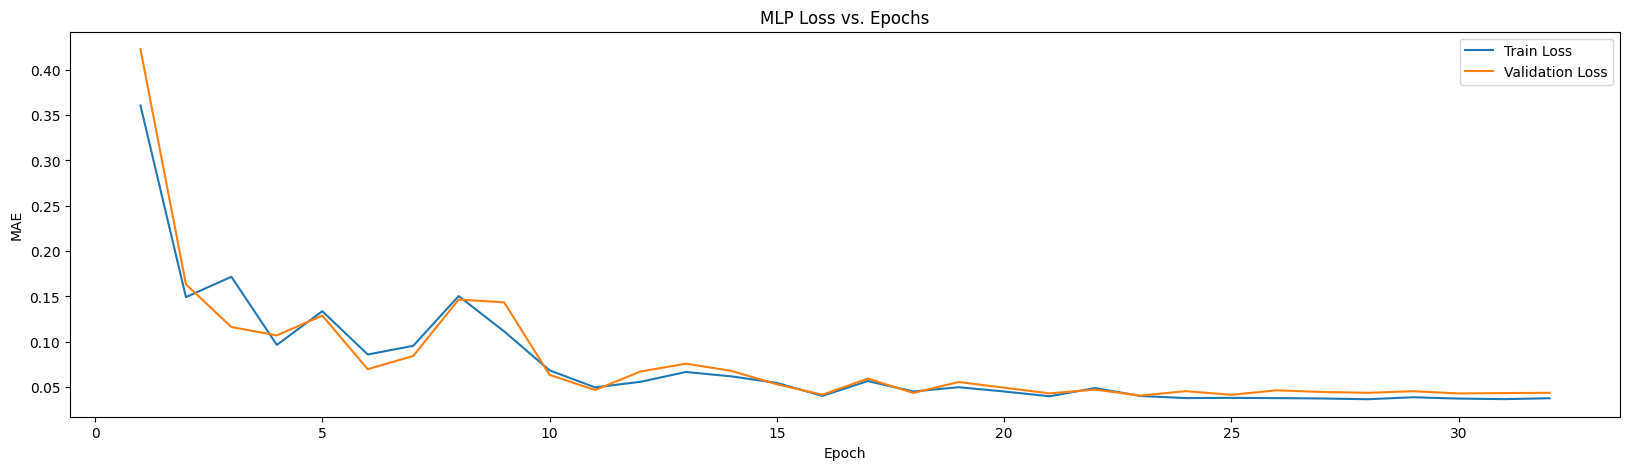

In [18]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 5]
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
size1=100
plt.plot(iteration_index2,train_mae,label="Train Loss")
plt.plot(iteration_index2,test_mae,label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.title("MLP Loss vs. Epochs")
plt.legend()

In [19]:
pred_wins=[0]*len(wintestN)
for ind,x in enumerate([0]*len(wintestN)):
    pred_wins[ind]=clf.predict(X2[ind].reshape(1,-1))
pred_winsb=[0]*len(pred_wins)
for indb,xb in enumerate(pred_wins):
    pred_winsb[indb]=float(xb)
predictedwin=unnormalize(pred_winsb,wintrain)
actualwins=unnormalize(wintestN,wintrain)

In [20]:
#Test - average accuracy of TEAM approach
aa=0
for ind,x in enumerate(wintestN):
    aa=aa+100*abs((predictedwin[ind]-actualwins[ind]))/actualwins[ind]
aa=aa/len(wintestN)
print('Average Accuracy (using percent error) of MLP network is:')
print(100-round(aa*10)/10,'%')
print()

from sklearn.metrics import r2_score
coefficient_of_dermination = r2_score(actualwins, predictedwin)
print('Test data R2 of our methodology after tuning:')
print(coefficient_of_dermination)
print()
print('R2 of the pythagorean win model:')
pwintest2=[0]*len(pwintest)
for ind,x in enumerate(pwintest):
    pwintest2[ind]=pwintest[ind]*82
coefficient_of_dermination2 = r2_score(actualwins, pwintest2)
print(coefficient_of_dermination2)

Average Accuracy (using percent error) of MLP network is:
91.7 %

Test data R2 of our methodology after tuning:
0.9219759926131117

R2 of the pythagorean win model:
0.9180601157347361


In [21]:
#Predict wins for average team (should be around 41)

def normalize2(input1,input2):
    maxinput1=max(input2)
    mininput1=min(input2)
    output2=(input1-mininput1)/(maxinput1-mininput1)
    return output2

OREavN=normalize2(OREav,OREtrain)
DREavN=normalize2(DREav,DREtrain)
pointsavN=normalize2(pointsav,pointstrain)
trueshootingavN=normalize2(trueshootingav,trueshootingtrain)
aPERavN=normalize2(aPERav,PERtrain)
pwinsavN=normalize2(pwinsav,pwintrain)

X3=np.column_stack((OREavN,DREavN,pointsavN,trueshootingavN,aPERavN,pwinsavN))

av_wins1=float(clf.predict(X3.reshape(1,-1)))*82
av_wins=round(float(clf.predict(X3.reshape(1,-1)))*82)
print('Average team will win:')
print(av_wins)
print('games')

Average team will win:
42
games


In [22]:
#Stats for average player per minute
pointsAp=pointsA/(5*48)
FGMAp=FGMA/(5*48)
FGAAp=FGAA/(5*48)
ORbAp=ORbA/(5*48)
DRbAp=DRbA/(5*48)
TOAp=TOA/(5*48)
FTAAp=FTAA/(5*48)
FTMAp=FTMA/(5*48)
plusminusAp=plusminusA/(5*48)
#MPAp=MPA/15*5 #5 players on court at all time
P3Ap=P3A/(5*48)
ASTAp=ASTA/(5*48)
PFAp=PFA/(5*48)
BLKAp=BLKA/(5*48)
STLAp=STLA/(5*48)

In [23]:
#Assign new data based off of each player
NBApd = pd.read_csv ('/content/drive/MyDrive/ECE_9603_Project/Data/Data/nba.csv')
NBA_pd = pd.DataFrame(NBApd)
NBApde = pd.read_csv ('/content/drive/MyDrive/ECE_9603_Project/Data/Data/nba_extra.csv')
NBA_pde = pd.DataFrame(NBApde)

pointsX=list(NBA_pde['PTS'])
FGMX=list(NBA_pde['FG'])
FGAX=list(NBA_pde['FGA'])
ORbX=list(NBA_pde['ORB'])
DRbX=list(NBA_pde['DRB'])
TOX=list(NBA_pde['TOV'])
FTAX=list(NBA_pde['FTA'])
FTMX=list(NBA_pde['FT'])
MPAX=list(NBA_pde['MP'])
P3X=list(NBA_pde['3P'])
ASTX=list(NBA_pde['AST'])
PFX=list(NBA_pde['PF'])
BLKX=list(NBA_pde['BLK'])
STLX=list(NBA_pde['STL'])
GPX=list(NBA_pde['G'])

plusminusX=[0]*len(pointsX)
pointsT=[0]*len(pointsX)
FGMT=[0]*len(pointsX)
FGAT=[0]*len(pointsX)
ORbT=[0]*len(pointsX)
DRbT=[0]*len(pointsX)
TOT=[0]*len(pointsX)
FTAT=[0]*len(pointsX)
FTMT=[0]*len(pointsX)
plusminusT=[0]*len(pointsX)
MPT=[0]*len(pointsX)
P3T=[0]*len(pointsX)
ASTT=[0]*len(pointsX)
PFT=[0]*len(pointsX)
BLKT=[0]*len(pointsX)
STLT=[0]*len(pointsX)
total_minutes_available=5*48*82
for ind,Xx in enumerate(pointsX):
    #plusminusX[ind]=pointsX[ind]-2*trueshootingav*(TOX[ind]+1.1*PFX[ind]/2)-pointsAp*MPAX[ind]
    #plusminusX[ind]=pointsX[ind]-pointsAp*MPAX[ind]
    three_point_usage=29/86.1
    two_point_usage=1-three_point_usage
    cs=two_point_usage*2+three_point_usage*3
    plusminusX[ind]=pointsX[ind]-pointsAp*MPAX[ind]+cs*(STLX[ind]-PFX[ind]/2+BLKX[ind]-TOX[ind])*trueshootingav
    #plusminusX[ind]=pointsX[ind]-2*0.5245*MPAX[ind]*two_point_usage-3*0.362*MPAX[ind]*three_point_usage
    pointsT[ind]=pointsAp*(total_minutes_available-MPAX[ind])+pointsX[ind]
    FGMT[ind]=FGMAp*(total_minutes_available-MPAX[ind])+FGMX[ind]
    FGAT[ind]=FGAAp*(total_minutes_available-MPAX[ind])+FGAX[ind]
    ORbT[ind]=ORbAp*(total_minutes_available-MPAX[ind])+ORbX[ind]
    DRbT[ind]=DRbAp*(total_minutes_available-MPAX[ind])+DRbX[ind]
    TOT[ind]=TOAp*(total_minutes_available-MPAX[ind])+TOX[ind]
    FTAT[ind]=FTAAp*(total_minutes_available-MPAX[ind])+FTAX[ind]
    FTMT[ind]=FTMAp*(total_minutes_available-MPAX[ind])+FTMX[ind]
    plusminusT[ind]=plusminusAp*(total_minutes_available-MPAX[ind])+plusminusX[ind]
    #MPT[ind]=MPAp*14*82+MPAX[ind]
    P3T[ind]=P3Ap*(total_minutes_available-MPAX[ind])+P3X[ind]
    ASTT[ind]=ASTAp*(total_minutes_available-MPAX[ind])+ASTX[ind]
    PFT[ind]=PFAp*(total_minutes_available-MPAX[ind])+PFX[ind]
    BLKT[ind]=BLKAp*(total_minutes_available-MPAX[ind])+BLKX[ind]
    STLT[ind]=STLAp*(total_minutes_available-MPAX[ind])+STLX[ind]
    pointsT[ind]=pointsT[ind]/82
    FGMT[ind]=FGMT[ind]/82
    FGAT[ind]=FGAT[ind]/82
    ORbT[ind]=ORbT[ind]/82
    DRbT[ind]=DRbT[ind]/82
    TOT[ind]=TOT[ind]/82
    FTAT[ind]=FTAT[ind]/82
    FTMT[ind]=FTMT[ind]/82
    plusminusT[ind]=plusminusT[ind]/82
    P3T[ind]=P3T[ind]/82
    ASTT[ind]=ASTT[ind]/82
    PFT[ind]=PFT[ind]/82
    BLKT[ind]=BLKT[ind]/82
    STLT[ind]=STLT[ind]/82
for ind,x in enumerate(plusminusT):
    plusminusT[ind]=plusminusT[ind]-sum(plusminusT)/len(plusminusT)

In [24]:
#Assign wins to each player

#offensive and defensive rating efficiency
possessionsT=[0]*len(pointsT)
ORET=[0]*len(pointsT)
pointsallowedT=[0]*len(pointsT)
DRET=[0]*len(pointsT)
for ind,x in enumerate(pointsT):
    possessionsT[ind]=0.96*(FGAT[ind]-ORbT[ind]+TOT[ind]+0.44*FTAT[ind])
    ORET[ind]=pointsT[ind]/possessionsT[ind]
    pointsallowedT[ind]=pointsT[ind]+plusminusT[ind]
    DRET[ind]=pointsallowedT[ind]/possessionsT[ind]
    
#true shooting percentage
trueshootingT=[0]*len(pointsT)
for ind,x in enumerate(pointsT):
    trueshootingT[ind]=pointsT[ind]/(2*(FGAT[ind]+0.44*FTAT[ind]))

#calculate aPER for all teams
uPERteamT=[0]*len(pointsT)
paceadjustmentT=[0]*len(pointsT)
aPERT=[0]*len(pointsT)
for ind,x in enumerate(pointsT):
    uPERteamT[ind]=(1/48)*(P3T[ind] - PFT[ind]*lgFT/lgPF + FTMT[ind]/2*(2-ASTT[ind]/(3*FGMT[ind])) + FGMT[ind]*(2-factor*ASTT[ind]/FGMT[ind]) + 2*ASTT[ind]/3 + VOP*(DRBP*(2*ORbT[ind]+BLKT[ind]-0.2464*(FTAT[ind]-FTMT[ind])-(FGAT[ind]-FGMT[ind])-(ORbT[ind]+DRbT[ind]))+0.44*lgFTA*PFT[ind]/lgPF-(TOT[ind]+ORbT[ind])+STLT[ind]+ORbT[ind]+DRbT[ind]-0.1936*(FTAT[ind]-FTMT[ind])))
    paceadjustmentT[ind]=2*lgPTS/(2*pointsT[ind]-plusminusT[ind])
    aPERT[ind]=paceadjustmentT[ind]*uPERteamT[ind]

#pythagorean win percentage
pwinT=[0]*len(pointsT)
for ind,x in enumerate(pointsT):
    pwinT[ind]=(pointsT[ind]**const_fact)/(pointsT[ind]**const_fact+(pointsT[ind]-plusminusT[ind])**const_fact)

#normalize
ORETN=normalize(ORET,OREtrain)
DRETN=normalize(DRET,DREtrain)
pointsTN=normalize(pointsT,pointstrain)
trueshootingTN=normalize(trueshootingT,trueshootingtrain)
PERTN=normalize(aPERT,PERtrain)
pwinTN=normalize(pwinT,pwintrain)

#make array
XT=np.column_stack((ORETN,DRETN,pointsTN,trueshootingTN,PERTN,pwinTN))

#predict impact
player_impact=[0]*len(pointsTN)
for ind,x in enumerate([0]*len(pointsTN)):
    player_impact[ind]=float(clf.predict(XT[ind].reshape(1,-1)))
player_impact_wins=unnormalize2(player_impact,wintrain)
for ind,x in enumerate([0]*len(pointsTN)):
    player_impact_wins[ind]=player_impact_wins[ind]-av_wins1
    
#scale player_impact_wins so mean is at 0
#mean_player_impact_wins=sum(player_impact_wins)/len(player_impact_wins)
#for ind,x in enumerate(player_impact_wins):
#    player_impact_wins[ind]=x-mean_player_impact_wins

In [25]:
#Find all NBA teams
teams_all=list(NBA_pde.Tm)
def unique(list1):
    unique_list = []
    for x in list1:
        if x not in unique_list:
            unique_list.append(x)
    return unique_list
 
Teams=unique(teams_all)
Teams.remove('TOT') #for people who played on multiple teams
print(Teams)

['OKC', 'BRK', 'MIA', 'ORL', 'MIN', 'SAS', 'BOS', 'NOP', 'POR', 'PHI', 'HOU', 'IND', 'MIL', 'TOR', 'CHI', 'DEN', 'ATL', 'CHO', 'NYK', 'LAL', 'DAL', 'WAS', 'GSW', 'PHO', 'LAC', 'SAC', 'DET', 'UTA', 'MEM', 'CLE']


In [26]:
#Use player impact score of each player on each team to predict wins for that season
import pandas as pd 
win_share_sum=[0]*30
existing_win_share_sum=[0]*30
for ind,x in enumerate(Teams):
    summation=av_wins1
    summation2=0
    indexs=list(NBA_pde[NBA_pde.Tm==x].index)
    for x2 in indexs:
        summation=summation+player_impact_wins[x2]
        summation2=summation2+NBA_pd.WS[x2]
    win_share_sum[ind]=summation # player impact score sum
    existing_win_share_sum[ind]=summation2 # actual win share sum
win_share_sum_mean=sum(win_share_sum)/len(win_share_sum)
for ind,x in enumerate(win_share_sum):
    win_share_sum[ind]=x-win_share_sum_mean+41

actual_wins=[48, 28, 44, 25, 47, 47, 55, 48, 49, 52, 65, 48, 44, 59, 27, 46, 24, 36, 29, 35, 24, 43, 58, 21, 42, 27, 39, 48, 22, 50] # wins of NBA teams from 2017 

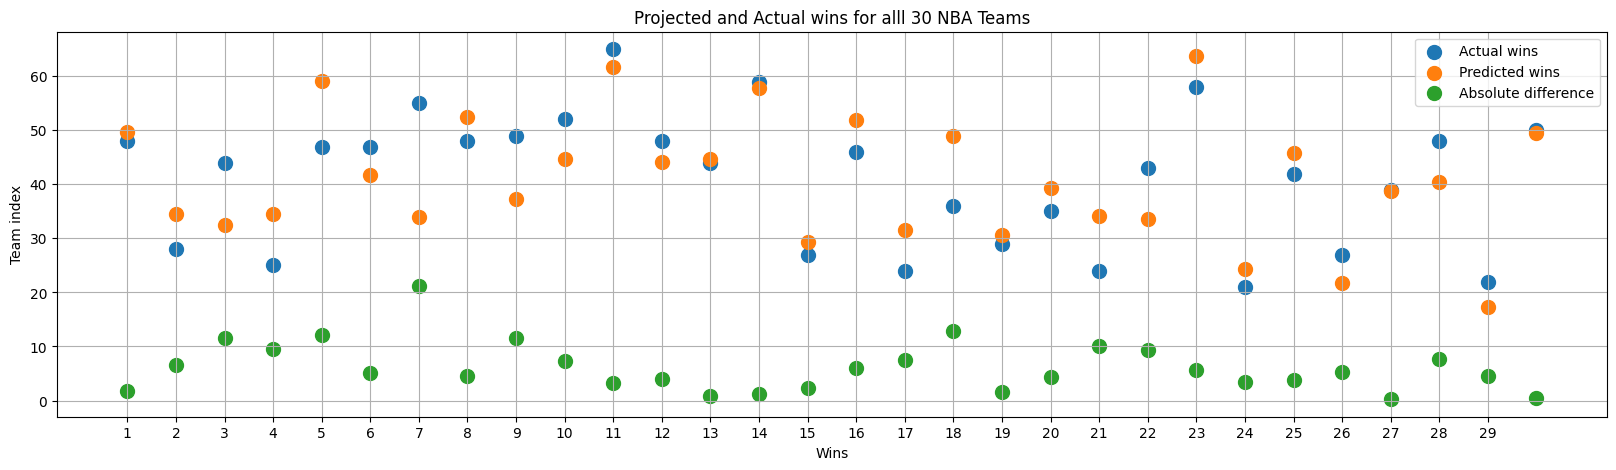

In [27]:
import matplotlib.pyplot as plt
xp=[0]*30
diff=[0]*30
for ind,x in enumerate(actual_wins):
    xp[ind]=ind+1
    diff[ind]=abs(actual_wins[ind]-win_share_sum[ind])
plt.rcParams['figure.figsize'] = [20, 5]
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
#plt.plot(xp, actual_wins, 'o', label='Actual Wins', xp, win_share_sum, 'o', label='Predicted Wins using Modified win share', xp, diff, 'o', label='Absolute difference between actual and expected wins')
size1=100
plt.scatter(xp,actual_wins,s=size1,label='Actual wins')
plt.scatter(xp,win_share_sum,s=size1,label='Predicted wins')
plt.scatter(xp,diff,s=size1,label='Absolute difference')

# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(1, 30, 1)

ax.set_xticks(major_ticks)
leg = ax.legend();

# And a corresponding grid
ax.grid(which='both')

xp=[0]*30
diff=[0]*30
for ind,x in enumerate([0]*30):
    xp[ind]=ind+1
    diff[ind]=abs(actual_wins[ind]-win_share_sum[ind])
plt.xlabel("Wins")
plt.ylabel("Team index")
plt.title("Projected and Actual wins for alll 30 NBA Teams")
plt.legend()

In [28]:
#Test accuracy of methodology 
aa=0
for ind,x in enumerate(actual_wins):
    aa=aa+100*abs((win_share_sum[ind]-actual_wins[ind]))/actual_wins[ind]
aa=aa/len(actual_wins)
print('Average Accuracy of modified winshare is:')
print(100-round(aa*10)/10,'%')


# Test r2
from sklearn.metrics import r2_score
coefficient_of_dermination = r2_score(actual_wins, win_share_sum) # r2 of player impact score
print()
print('R2 of modified winshare is:')
print(coefficient_of_dermination)
print()
print('Coefficient of existing win share:')
coefficient_of_dermination2 = r2_score(actual_wins, existing_win_share_sum) #r2 of actual winshares
print(coefficient_of_dermination2) #https://paceandspacehoops.com/how-well-do-nba-win-shares-correlate-to-actual-wins/

Average Accuracy of modified winshare is:
83.5 %

R2 of modified winshare is:
0.590510809635235

Coefficient of existing win share:
0.9132063711911356


In [29]:
#Assign value of wins
winpd=0.737 #win percentage of 15 consecutive NBA champions (2005-2019)
av_salary_t=111e6
#av_salary=135e6
av_salary_player=6e6
cost_of_win=av_salary_t/(winpd*82)

In [30]:
#Assign Value for each player
projected_salary=[0]*len(pointsTN)
for ind, x in enumerate(pointsTN):
    projected_salary[ind]=av_salary_player+player_impact_wins[ind]*cost_of_win

In [31]:
#Maximum Salary in millions
round(max(projected_salary)*1e-6)

54

In [32]:
#Which player should get the most money/ Which player contributed the most to winning
NBA_pde.Player[projected_salary.index(max(projected_salary))]

'Anthony Davis\\davisan02'

In [33]:
ls = sorted(range(len(projected_salary)), key=lambda x: projected_salary[x])[-13:]
ls.reverse()

In [34]:
#Use for comparison to MVP rankings
print("The top 13 performers in 2017/18 Season according to our player impact score were:")
for (i, item) in enumerate(ls, start=1):
  print(i, NBA_pde.Player[item])
  print(i, round(projected_salary[item]*1e-4)/100)

The top 13 performers in 2017/18 Season according to our player impact score were:
1 Anthony Davis\davisan02
1 54.48
2 James Harden\hardeja01
2 42.77
3 Giannis Antetokounmpo\antetgi01
3 40.97
4 Kevin Durant\duranke01
4 39.84
5 LeBron James\jamesle01
5 38.38
6 LaMarcus Aldridge\aldrila01
6 38.3
7 Damian Lillard\lillada01
7 36.14
8 Victor Oladipo\oladivi01
8 34.05
9 Stephen Curry\curryst01
9 32.93
10 Kyrie Irving\irvinky01
10 31.69
11 DeMar DeRozan\derozde01
11 31.24
12 Kemba Walker\walkeke02
12 29.06
13 Jimmy Butler\butleji01
13 28.2
